In [9]:
import os
import cv2
import numpy as np
import pandas as pd


In [10]:
print("="*60)
print("✅ Step 1: Load Data and Extract Features")
print("="*60)

✅ Step 1: Load Data and Extract Features


In [11]:
import os
import cv2
import numpy as np
import pandas as pd

def extract_tumor_area(mask_path):
    """Load mask and calculate tumor area (white pixels)."""
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        return 0
    return np.sum(mask > 0)

def process_dataset(base_path):
    """Create labeled dataset from benign/malignant folders."""
    data = []
    for label_folder in ["benign", "malignant"]:
        folder_path = os.path.join(base_path, label_folder)
        for filename in os.listdir(folder_path):
            if "_mask" in filename or not filename.endswith(".png"):
                continue
            image_path = os.path.join(folder_path, filename)
            mask_path = os.path.join(folder_path, filename.replace(".png", "_mask.png"))

            tumor_area = extract_tumor_area(mask_path)

            # Assign priority based on label and tumor area
            if label_folder == "benign":
                priority = "Low"
            else:
                priority = "High" if tumor_area > 200 else "Medium"

            data.append({
                "image": image_path,
                "mask": mask_path,
                "tumor_area": tumor_area,
                "priority": priority
            })

    return pd.DataFrame(data)


In [7]:
print("="*60)
print("✅ Step 2: Process Training Set")
print("="*60)

✅ Step 2: Process Training Set


In [12]:
# Assuming you're running from the root folder where training_set is located
df = process_dataset("training_set")
df.head()

,image,mask,tumor_area,priority
0,training_set\benign\benign (1).png,training_set\benign\benign (1)_mask.png,984,Low
1,training_set\benign\benign (10).png,training_set\benign\benign (10)_mask.png,32918,Low
2,training_set\benign\benign (100).png,training_set\benign\benign (100)_mask.png,7090,Low
3,training_set\benign\benign (101).png,training_set\benign\benign (101)_mask.png,4167,Low
4,training_set\benign\benign (102).png,training_set\benign\benign (102)_mask.png,18857,Low


In [13]:
print("="*60)
print("✅ Step 3: Explore the Data")
print("="*60)

✅ Step 3: Explore the Data


Shape: (547, 4)

Class distribution:
priority
Low     387
High    160
Name: count, dtype: int64


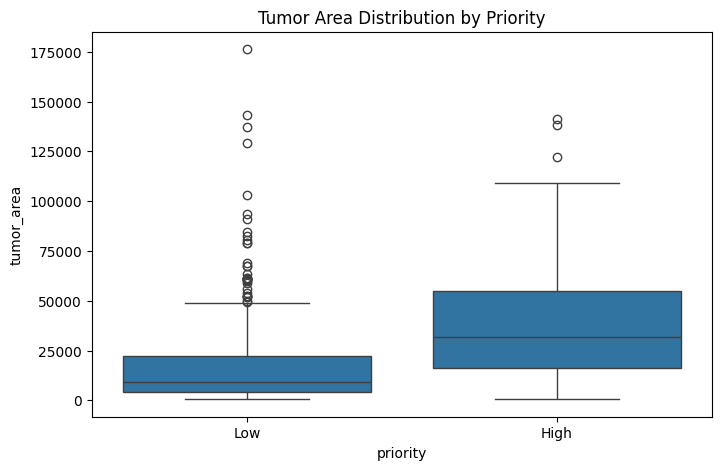

In [14]:
# Summary
print("Shape:", df.shape)
print("\nClass distribution:")
print(df["priority"].value_counts())

# Visualize tumor area by class
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="priority", y="tumor_area", data=df)
plt.title("Tumor Area Distribution by Priority")
plt.show()


In [12]:
print("="*60)
print("✅ Step 4: Train-Test Split and Model Training \n We'll use tumor_area as the feature and priority as the label to train a Random Forest Classifier.")
print("="*60)

✅ Step 4: Train-Test Split and Model Training 
 We'll use tumor_area as the feature and priority as the label to train a Random Forest Classifier.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# 1. Prepare features (X) and labels (y)
X = df[["tumor_area"]]  # using tumor_area as the only feature
y = df["priority"]

# 2. Encode labels to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)


In [14]:
print("="*60)
print("✅ Step 5: Evaluate the Model")
print("="*60)

✅ Step 5: Evaluate the Model


In [15]:
# Decode predictions back to labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Classification report
print("🔍 Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Accuracy & F1-score
acc = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")

print(f"✅ Accuracy: {acc:.2f}")
print(f"✅ F1-Score: {f1:.2f}")


🔍 Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.39      0.35        28
         Low       0.77      0.71      0.74        82

    accuracy                           0.63       110
   macro avg       0.54      0.55      0.54       110
weighted avg       0.66      0.63      0.64       110

✅ Accuracy: 0.63
✅ F1-Score: 0.64


In [16]:
print("="*60)
print("✅ Step 6: Plot Confusion Matrix")
print("="*60)

✅ Step 6: Plot Confusion Matrix


In [1]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


NameError: name 'clf' is not defined

In [ ]:
Ethical Reflection:

Deploying predictive analytics in real-world environments, especially those influencing issue prioritization, demands careful attention to ethical concerns, particularly bias and fairness.

1. Potential Biases in the Dataset:
While the Breast Cancer dataset is medical in nature, if we analogize it to issue prioritization in a company:

The dataset may not equally represent all departments, regions, or types of issues (akin to underrepresented groups).

If the training data is skewed (e.g., more high-priority cases from one department), the model could over-prioritize issues from that group.

Historical bias may be embedded — e.g., previous prioritizations may reflect subjective human decisions that were unfair.

2. Addressing Bias with IBM AI Fairness 360:
Tools like IBM AI Fairness 360 (AIF360) help:

Detect bias in predictions and datasets using statistical fairness metrics like disparate impact and equal opportunity.

Mitigate bias via preprocessing (balancing data), in-processing (fairness constraints during training), or post-processing (adjusting model outputs).

Audit and report fairness issues to stakeholders for transparency and accountability.

By integrating AIF360 into our model pipeline, we could:

Check if predictions disproportionately favor a particular class (e.g., always assigning "low priority" to issues from certain teams).

Adjust the model or dataset to ensu